# Table of Contents

1. [Load Project](##Load-Project) 
2. [Simulated Agent Modelling](#Simulated-Agent-Modelling)
    1. [Plot 1: Simulated Agent vs Mouse Performance across Time](#Plot-1:-Simulated-Agent-vs-Mouse-Performance-across-Time)
    2. [Plot 2: Relative Performance across Time](#Plot-2:-Relative-Performance-across-Time)
    3. [Plot 3: Avg. Simulated Agent and Mouse Performance across Sessions(/Mice)](#Plot-3:-Avg.-Simulated-Agent-and-Mouse-Performance-across-Sessions)
3. [Chi Square Analysis](#Chi-Square-Analysis)
4. [Simulated Agent, Binary Agent, 3 or 4-way Agent Modelling & Comparison](#Simulated-Agent,-Binary-Agent,-3-or-4-way-Agent-Modelling-&-Comparison)
    1. [Plot 5: All Agents Comparative Performance over time](#Plot-5:-All-Agents-Comparative-Performance-over-time)
    2. [Plot 6: Cumulative Agent Performance](#Plot-6:-Cumulative-Multiple-Agent-Performance)
5. [Exploration-Exploitation (EE) Agent Evaluation](#Exploration-Exploitation-(EE)-Agent-Evaluation)
    1. [Plot 7: Agent Performance Across Varying Exploration Rates](#Plot-7:-Agent-Performance-Across-Varying-Exploration-Rates)

# Load Project

Load project's configuration, metadata and combined data.

In [1]:
from pathlib import Path
import pandas as pd
from compass_labyrinth import load_project


project_path = Path(".").resolve() / "my_project_2"

# Import config and metadata
config, cohort_metadata = load_project(project_path=project_path)

# Import all sessions combined pose-estimation CSV
df_all_csv = pd.read_csv(project_path / "csvs" / "combined" / "Preprocessed_combined_file_exclusions.csv")

# Simulated Agent Modelling

This function evaluates the performance of a simulated agent navigating the maze by estimating the proportion of optimal decisions (e.g., choosing the reward path) within fixed-size epochs across multiple simulations and bootstrap samples.

It also trims the simulated agent performance dataframe to the set of common epochs shared across all simulations, ensuring clean aggregation and plotting.

### Recommended Use:
1. Ensure `df_all_csv` includes 'Session', 'Grid Number', and the specified decision node labels.
2. Set `epoch_size` to define the number of frames grouped into each epoch (e.g., 1000).
3. Set `n_bootstrap` to the number of bootstrap resamples per simulation.
4. Set `n_simulations` to the number of independent simulated agents to evaluate.
5. Set `decision_label` to the node type representing decision points (e.g., 'Decision (Reward)').
6. Set `reward_label` to the region considered as the optimal path (e.g., 'Reward Path').

In [2]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import evaluate_agent_performance

# Set these values
EPOCH_SIZE = 1000
N_BOOTSTRAP = 10000
N_SIMULATIONS = 100
DECISION_LABEL = "Decision (Reward)"
REWARD_LABEL = "reward_path"
GENOTYPE = "WT"

sim_results = evaluate_agent_performance(
    df=df_all_csv,
    epoch_size=EPOCH_SIZE,
    n_bootstrap=N_BOOTSTRAP,
    n_simulations=N_SIMULATIONS,
    decision_label=DECISION_LABEL,
    reward_label=REWARD_LABEL,
    trim=True,
)
sim_results["WT"]

 Max common epoch across all sessions: 26
 Max common epoch across all sessions: 55


,Actual Reward Path %,Simulated Agent Reward Path %,Actual Reward Path % CI Lower,Actual Reward Path % CI Upper,Simulated Agent Reward Path % CI Lower,Simulated Agent Reward Path % CI Upper,Relative Performance,Session,Epoch Number
0,0.923940,0.748434,0.885496,0.961832,0.732214,0.764198,1.234498,3,1
1,0.927493,0.747362,0.900763,0.954198,0.737023,0.757521,1.241023,3,2
2,0.896362,0.699103,0.862069,0.931034,0.684397,0.713793,1.282159,3,3
3,0.917142,0.730479,0.888430,0.946281,0.718965,0.742068,1.255534,3,4
4,0.932080,0.718258,0.900524,0.958115,0.702984,0.733353,1.297696,3,5
...,...,...,...,...,...,...,...,...,...
73,0.885978,0.680947,0.822785,0.936709,0.658734,0.702785,1.301098,5,22
74,0.916607,0.710688,0.882353,0.946078,0.697252,0.723775,1.289746,5,23
75,0.914044,0.754817,0.880383,0.942584,0.745742,0.763493,1.210947,5,24
76,0.897510,0.670536,0.860215,0.930108,0.654409,0.686454,1.338496,5,25


## Plot 1: Simulated Agent vs Mouse Performance across Time

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/all_genotypes_sim_agent_mouse_perf.pdf


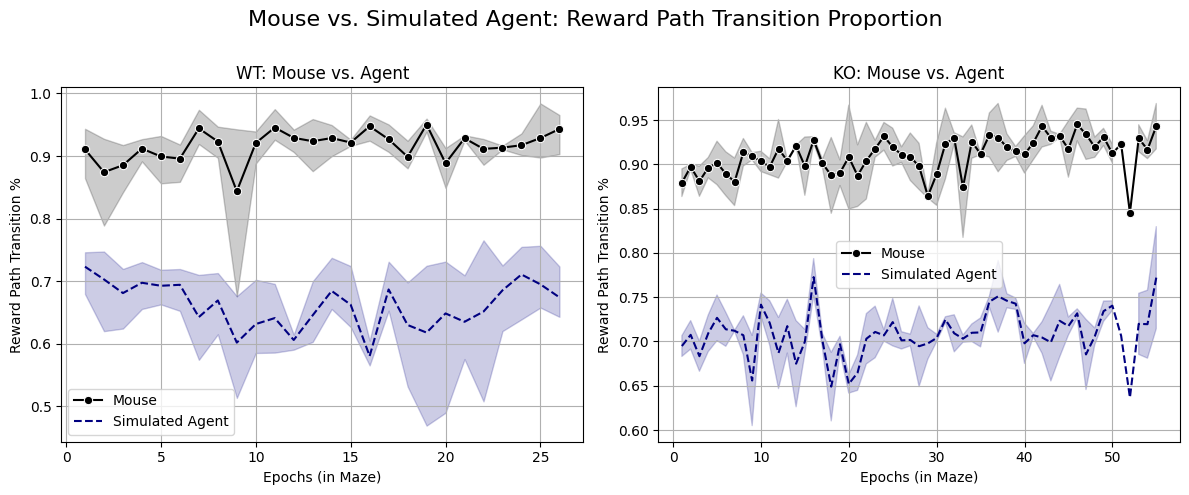

In [3]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_agent_transition_performance


plot_agent_transition_performance(
    config=config,
    evaluation_results=sim_results,
)

## Plot 2: Relative Performance across Time

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/all_genotypes_relative_perf.pdf


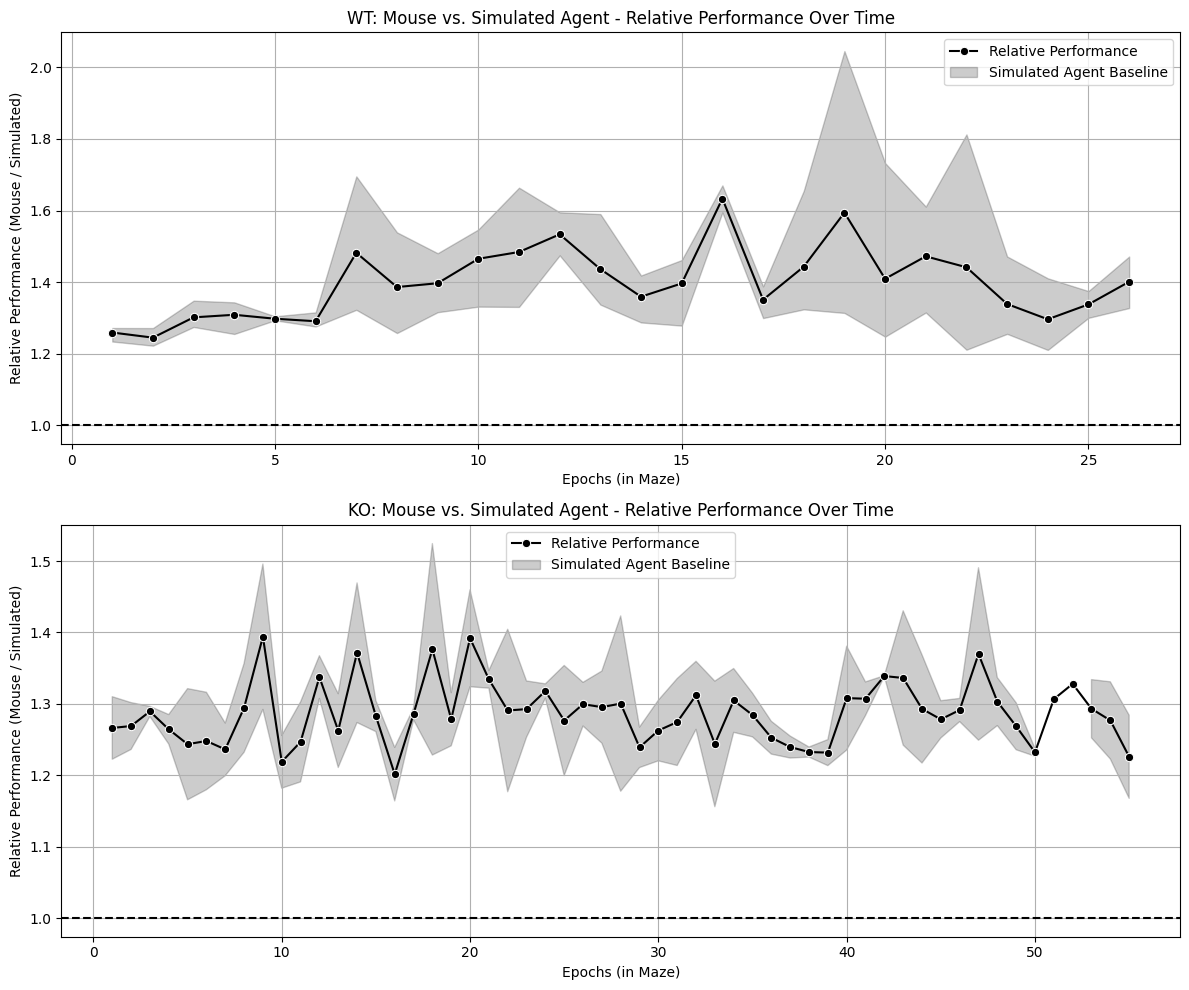

In [4]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_relative_agent_performance


plot_relative_agent_performance(
    config=config,
    evaluation_results=sim_results,
)

## Plot 3: Avg. Simulated Agent and Mouse Performance across Sessions

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/cumulative_sim_agent_mouse_perf.pdf


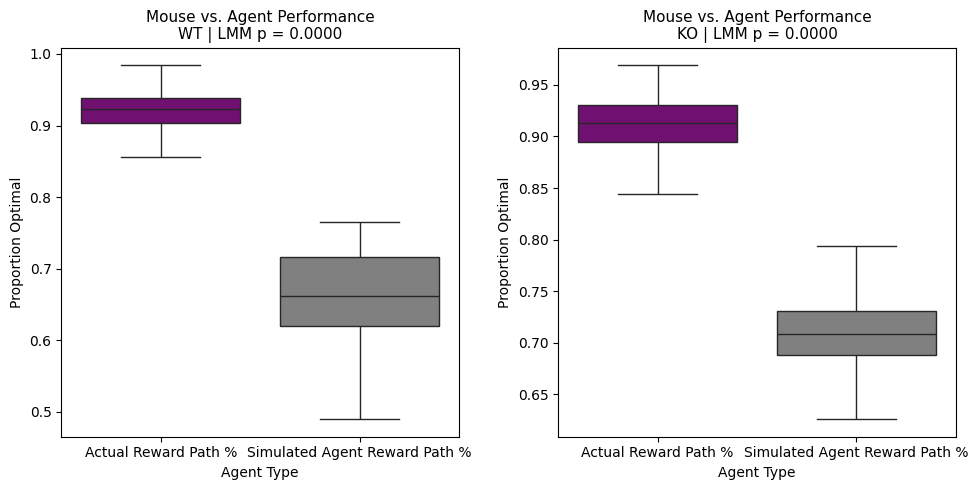

{'WT': np.float64(6.127002099983219e-215), 'KO': np.float64(0.0)}


In [5]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import run_mixedlm_for_all_genotypes


pvals_by_genotype = run_mixedlm_for_all_genotypes(
    config=config,
    evaluation_results=sim_results,
    plot_palette=["purple", "grey"],
)
print(pvals_by_genotype)

# Chi Square Analysis

This workflow calculates the chi-square divergence between actual animal performance and a simulated agent’s expected behavior across epochs, and summarizes the result using both rolling and cumulative statistics to track behavioral divergence over time.

### Recommended Use:
1. Ensure `df_sim` contains 'Actual Reward Path %', 'Simulated Agent Reward Path %', 'Epoch Number', and 'Session' columns.
2. Use `compute_chi_square_statistic()` to compute per-epoch chi-square scores comparing actual vs. simulated usage.
3. Use `compute_rolling_chi_square()` to calculate rolling averages over time for trend visualization.
4. Use `compute_cumulative_chi_square()` to track the running average of chi-square divergence over all prior epochs.

In [6]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import run_chi_square_analysis


ROLLING_WINDOW = 3

# Compute chi-square stats for each genotype
chisquare_results = run_chi_square_analysis(
    config=config,
    evaluation_results=sim_results,
    rolling_window=ROLLING_WINDOW
)

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/all_genotypes_chi_square_rolling.pdf


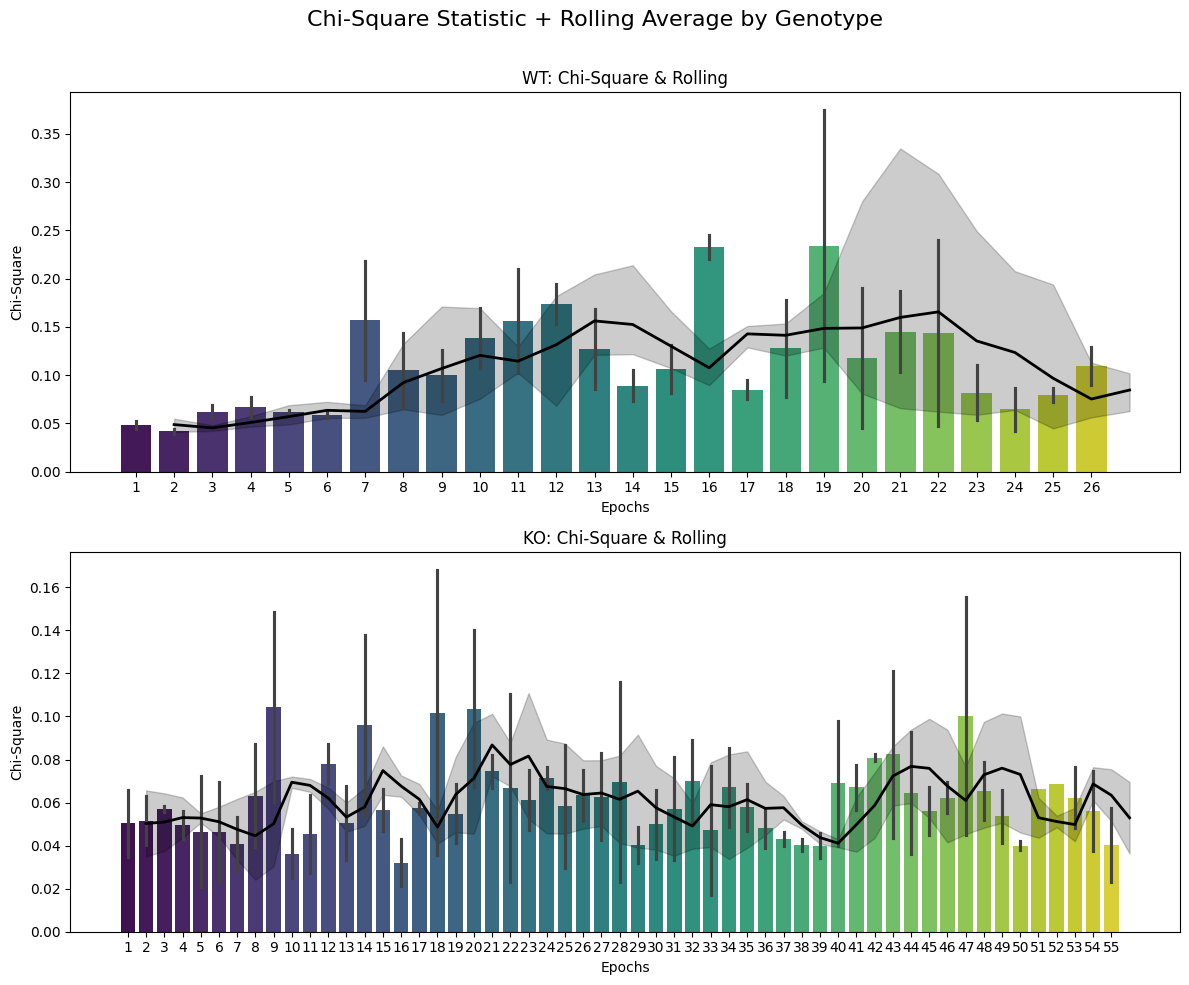

In [7]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_chi_square_and_rolling


plot_chi_square_and_rolling(
    config=config,
    chisquare_results=chisquare_results,
)

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/all_genotypes_average_chi_square_rolling.pdf


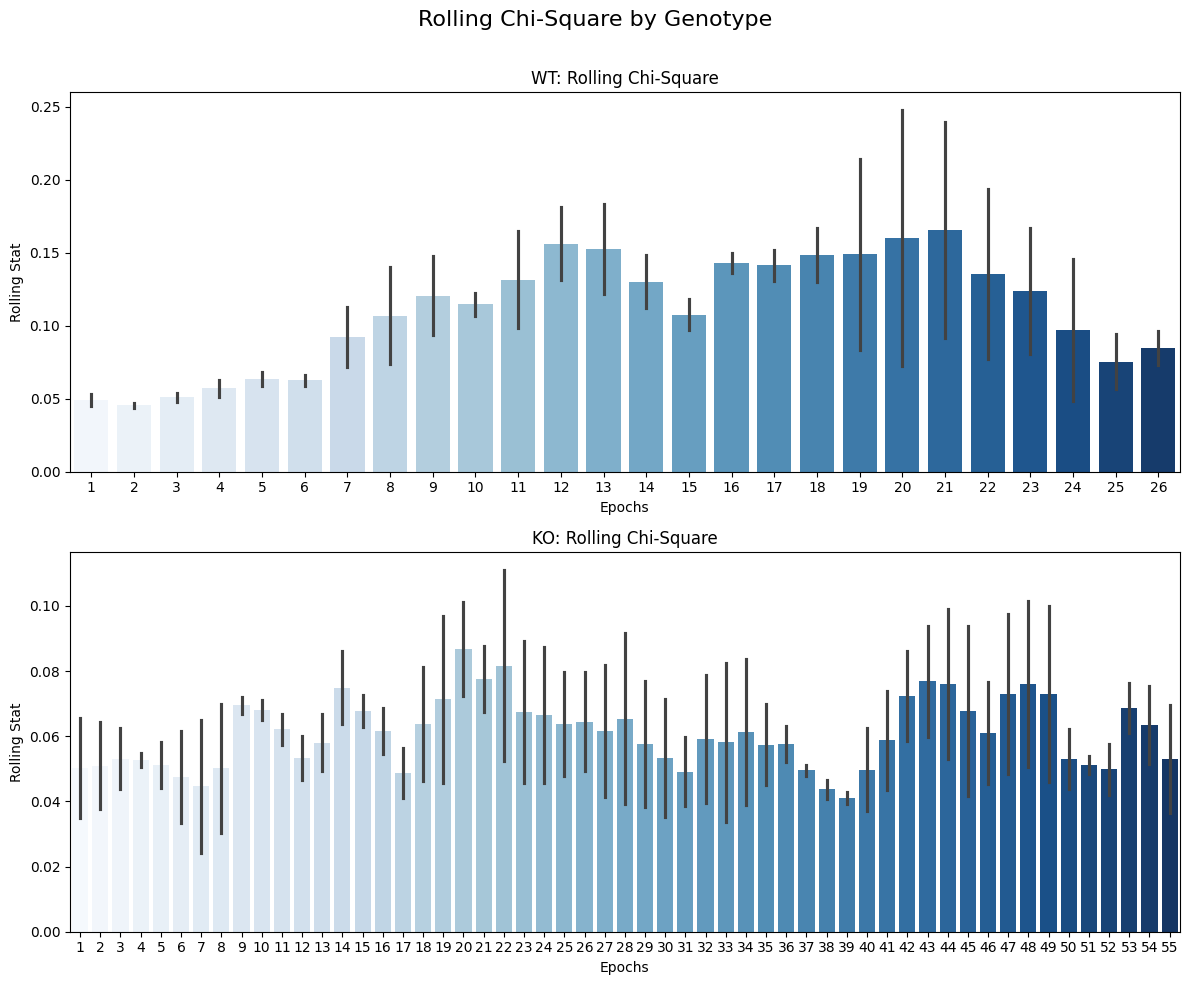

In [8]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_rolling_mean


plot_rolling_mean(
    config=config,
    chisquare_results=chisquare_results,
)

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/all_genotypes_cumulative_chi_square.pdf


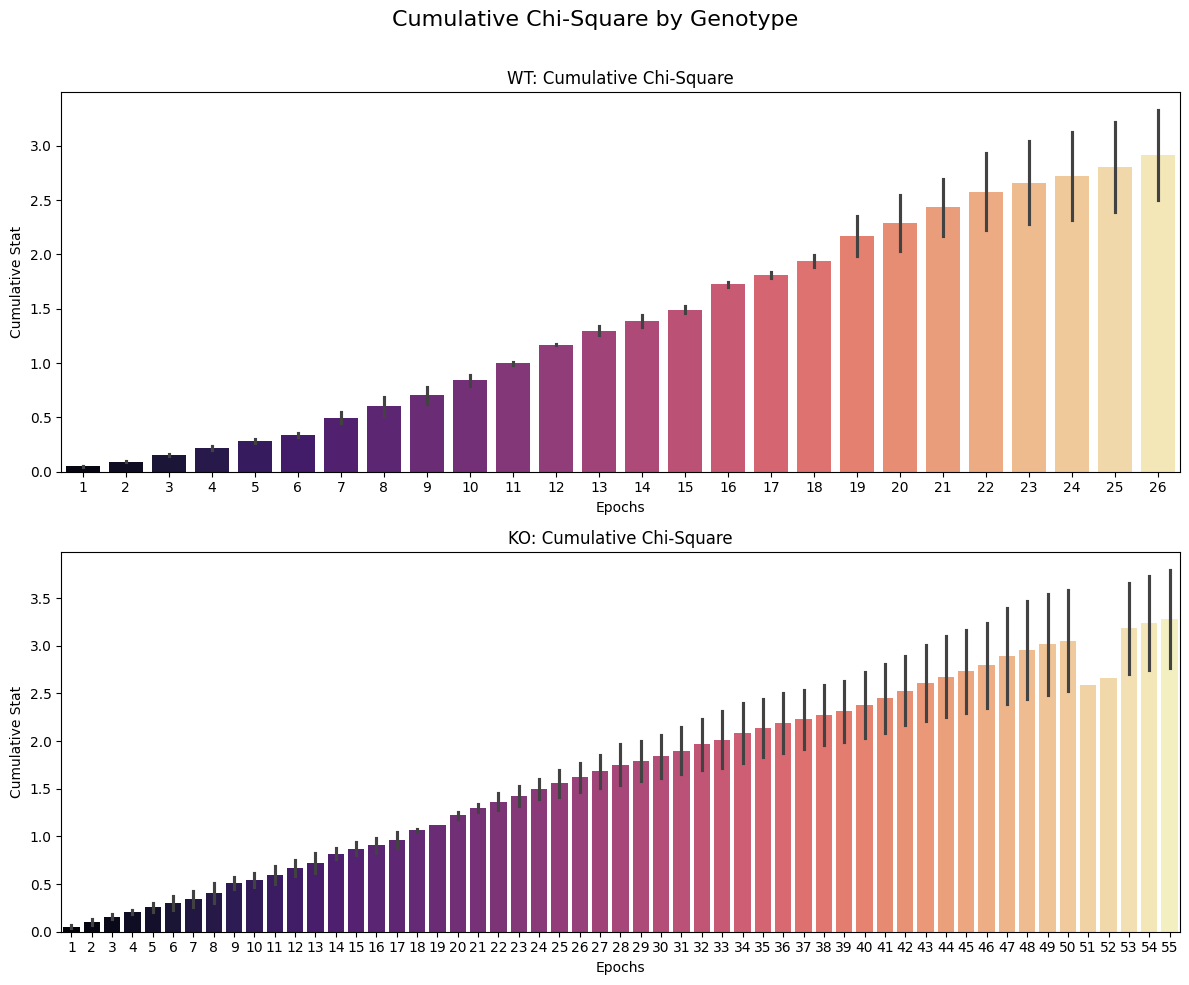

In [9]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_cumulative_chi_square


plot_cumulative_chi_square(
    config=config,
    chisquare_results=chisquare_results,
)

# Simulated Agent, Binary Agent, 3 or 4-way Agent Modelling & Comparison

This function simulates multiple agent types (simulated, binary, and 3/4-way), evaluates their decision performance over fixed-size epochs, and compares them to actual animal decisions using bootstrap confidence intervals.

### Recommended Use:
1. Ensure `df_all_csv` includes 'Session', 'NodeType', 'Region', and 'Grid Number'.
2. Use `epoch_size` to define the time resolution (e.g., 1000 frames per epoch).
3. Set `n_simulations` and `n_bootstrap` to define agent variability and confidence bounds.
4. Use `decision_label` and `reward_label` to define relevant transitions (e.g., 'Decision (Reward)', 'Reward Path').
5. Optional: Pass custom 3-way and 4-way decision node sets.

In [10]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import evaluate_agent_performance_multi


# Evaluate agent vs. actual decisions
df_all_simulated = evaluate_agent_performance_multi(
    df=df_all_csv,
    epoch_size=EPOCH_SIZE,
    n_bootstrap=N_BOOTSTRAP,
    n_simulations=N_SIMULATIONS,
    decision_label=DECISION_LABEL,
    reward_label=REWARD_LABEL,
    trim=True,
)
df_all_simulated

 Max common epoch across all sessions: 26


,Actual Reward Path %,Random Agent Reward Path %,Binary Agent Reward Path %,Three/Four Way Agent Reward Path %,Actual Reward Path % CI Lower,Actual Reward Path % CI Upper,Random Agent Reward Path % CI Lower,Random Agent Reward Path % CI Upper,Binary Agent Reward Path % CI Lower,Binary Agent Reward Path % CI Upper,Three/Four Way Agent Reward Path % CI Lower,Three/Four Way Agent Reward Path % CI Upper,Relative Performance (Actual/Random),Relative Performance (Actual/Binary),Session,Epoch Number
0,0.923615,0.751548,0.497364,0.300797,0.885496,0.961832,0.735573,0.767176,0.489084,0.505420,0.291756,0.310076,1.228951,1.857021,3,1
1,0.927951,0.749971,0.496901,0.309913,0.900763,0.954198,0.739998,0.760153,0.491945,0.501832,0.304008,0.315840,1.237315,1.867476,3,2
2,0.896551,0.692951,0.496214,0.317039,0.862069,0.926724,0.678103,0.707845,0.491078,0.501422,0.310733,0.323362,1.293815,1.806782,3,3
3,0.917495,0.731893,0.501693,0.314694,0.888430,0.946281,0.719669,0.744132,0.496446,0.507025,0.308719,0.320702,1.253591,1.828797,3,4
4,0.932093,0.720083,0.499386,0.325859,0.900524,0.963351,0.704660,0.735395,0.493243,0.505550,0.319948,0.331780,1.294425,1.866479,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.947535,0.684012,0.497143,0.313984,0.926573,0.968531,0.674091,0.694058,0.492483,0.501853,0.308846,0.318986,1.385261,1.905960,7,22
126,0.907552,0.683316,0.497201,0.323391,0.870370,0.944444,0.669812,0.696728,0.490864,0.503642,0.315864,0.330864,1.328159,1.825321,7,23
127,0.946756,0.717656,0.492673,0.319343,0.920705,0.969163,0.705419,0.729868,0.487225,0.498062,0.313348,0.325419,1.319234,1.921670,7,24
128,0.940703,0.697772,0.496165,0.310431,0.911330,0.965517,0.685663,0.709901,0.490342,0.501970,0.303547,0.317241,1.348153,1.895950,7,25


## Plot 5: All Agents Comparative Performance over time

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/WT_multiple_agent.pdf


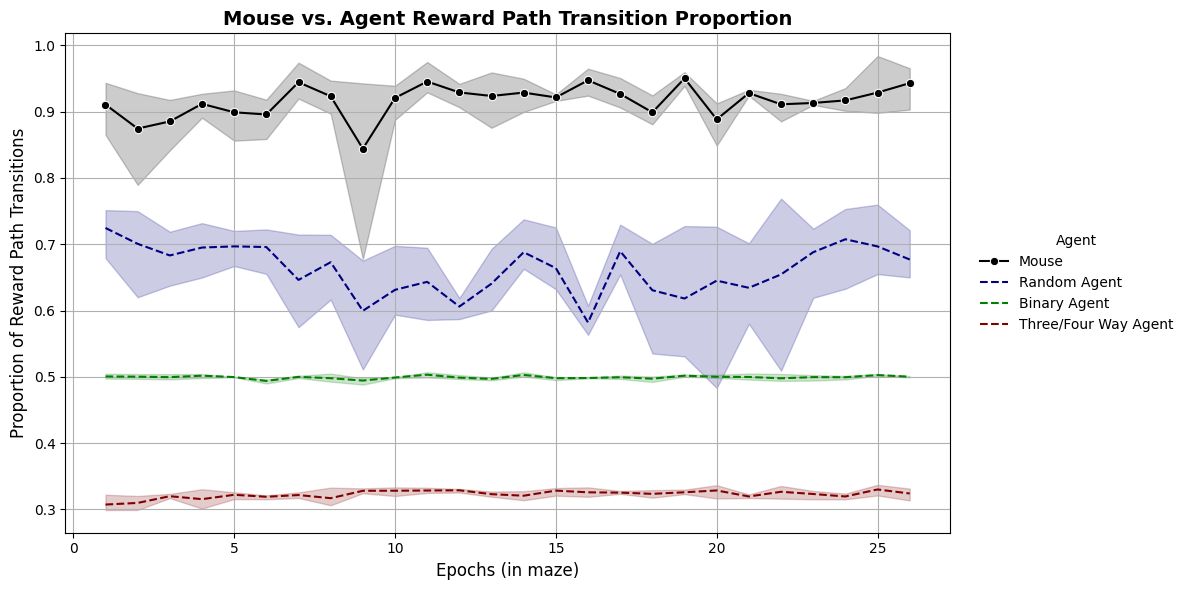

In [11]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_agent_vs_mouse_performance_multi


GENOTYPE = 'WT'

plot_agent_vs_mouse_performance_multi(
    config=config,
    df_metrics=df_all_simulated,
    cohort_metadata=cohort_metadata,
    genotype=GENOTYPE,
)

## Plot 6: Cumulative Multiple Agent Performance

This function compares average reward path transition percentages across sessions for mouse and simulated agents using a boxplot. Useful for visualizing group-wise strategy efficiency.

### Recommended Use:
1. Provide `df_metrics` from evaluate_agent_performance_multi().
2. Provide `cohort_metadata` with 'Session #' and 'Genotype'.
3. Set `genotype` to the group you want to compare.

Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/WT_cumulative_multiple_agent.pdf


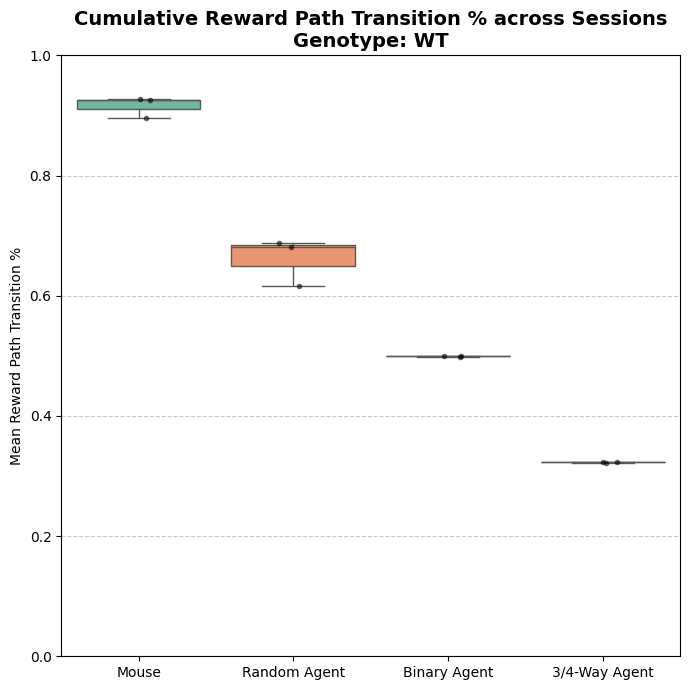

In [12]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_cumulative_agent_comparison_boxplot_multi


GENOTYPE = 'WT'

plot_cumulative_agent_comparison_boxplot_multi(
    config=config,
    df_metrics=df_all_simulated,
    cohort_metadata=cohort_metadata,
    genotype=GENOTYPE,
    figsize=(7, 7),
)

# Exploration-Exploitation (EE) Agent Evaluation

This module simulates an exploration-exploitation agent with a tunable exploration rate and compares its reward path transition performance to that of real mice over fixed-size epochs.

### Recommended Use:
1. Ensure `df_all_csv` includes 'Session', 'NodeType', 'Region', and 'Grid Number' columns.
2. Set `exploration_rate` to define the agent’s behavior:
      - Low values (e.g., 0.2) bias toward exploitation (optimal paths).
      - High values (e.g., 0.9) bias toward exploration (random paths).
3. Use `segment_size` consistently in both analysis and plotting functions.
4. Use `n_simulations` and `n_bootstrap` to determine statistical confidence.
5. Use `decision_label` and `reward_label` to define what constitutes a decision and a reward-oriented move.

In [13]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import run_exploration_agent_analysis_EE
import numpy as np


SEGMENT_SIZE = 1000  # Ensure this is consistent across functions
EXPLORATION_RATE = 0.5  # Tunable parameter for agent behavior

df_agent_perf = run_exploration_agent_analysis_EE(
    df=df_all_csv,
    exploration_rate=EXPLORATION_RATE,
    segment_size=SEGMENT_SIZE,
    n_bootstrap=10000,
    n_simulations=100,
    decision_label='Decision (Reward)',
    reward_label='reward_path',
)
df_agent_perf

 Max common epoch across all sessions: 26


,Actual Reward Path %,Agent Reward Path %,Actual Reward Path % CI Lower,Actual Reward Path % CI Upper,Agent Reward Path % CI Lower,Agent Reward Path % CI Upper,Relative Performance,Session,Epoch Number
0,0.863970,0.855894,0.826291,0.901408,0.847509,0.864131,1.009437,6,1
1,0.894246,0.863607,0.855556,0.933333,0.855331,0.871722,1.035478,6,2
2,0.897874,0.851012,0.862245,0.933673,0.841939,0.859745,1.055066,6,3
3,0.884607,0.847398,0.843537,0.925170,0.837347,0.857483,1.043909,6,4
4,0.877539,0.873403,0.836257,0.918129,0.865322,0.881345,1.004736,6,5
...,...,...,...,...,...,...,...,...,...
125,0.885952,0.848380,0.822785,0.936709,0.836329,0.860259,1.044287,5,22
126,0.916440,0.856181,0.882353,0.946078,0.848529,0.863676,1.070381,5,23
127,0.914030,0.876937,0.880383,0.942584,0.871148,0.882632,1.042298,5,24
128,0.897738,0.837555,0.860215,0.935484,0.829194,0.845806,1.071855,5,25


## Plot 7: Agent Performance Across Varying Exploration Rates

Visualize agent vs. mouse performance across exploration rates:

Exploration rate =  0.2  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.3  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.4  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.5  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.6  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.7  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.8  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.9  being processed....
 Max common epoch across all sessions: 26
 Max common epoch across all sessions: 26
Figure saved at: /Users/luiztauffer/Github/CoMPASS-Labyrinth/notebooks/my_project_2/figures/ee_agent.pdf


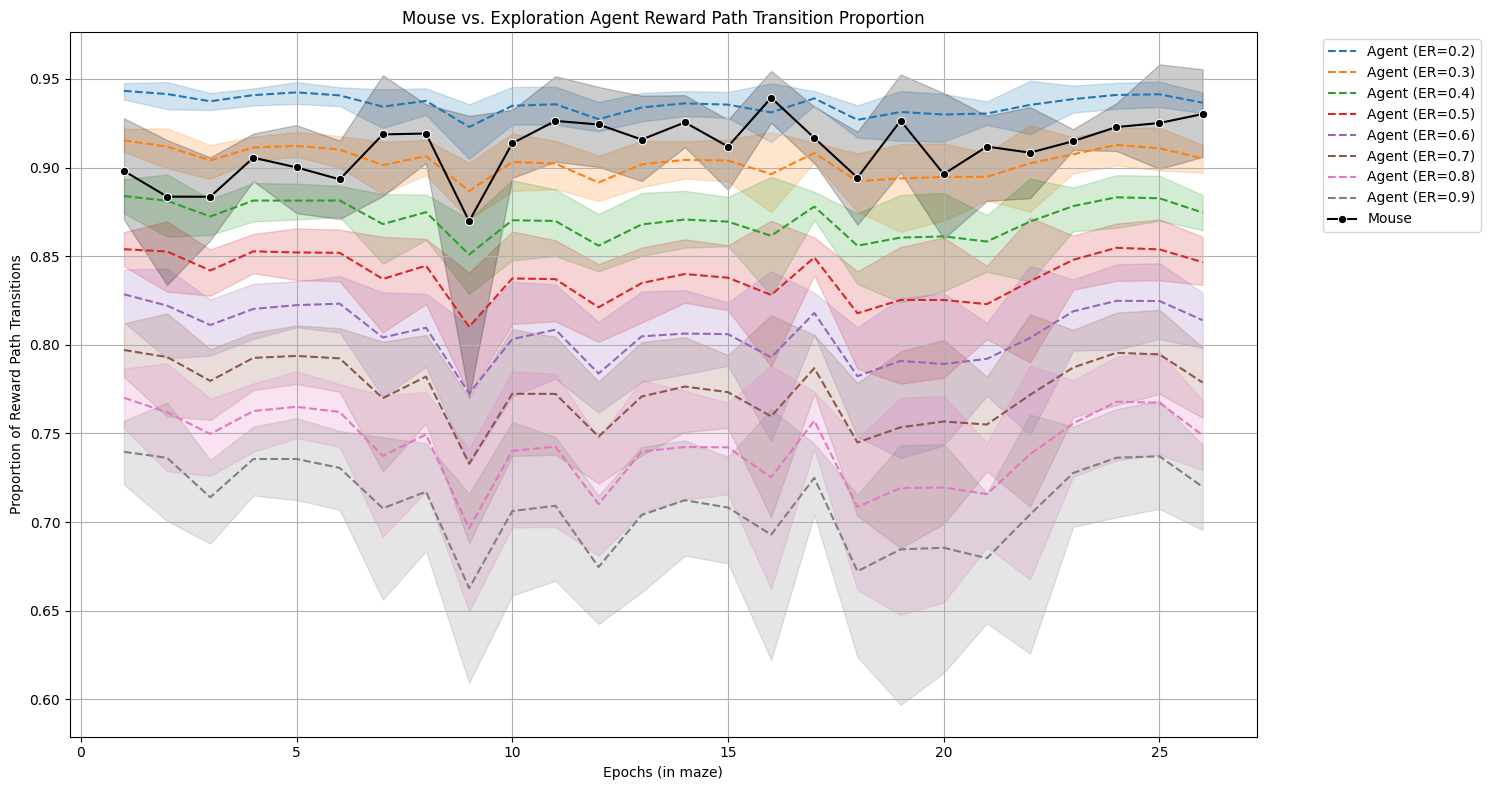

In [14]:
from compass_labyrinth.behavior.behavior_metrics.simulation_modeling import plot_exploration_rate_performance_EE


# Range of exploration rate values
EXPLORATION_RATE_RANGE = np.arange(0.2, 1.0, 0.1)

plot_exploration_rate_performance_EE(
    config=config,
    df_source=df_all_csv,
    exploration_rates=EXPLORATION_RATE_RANGE,
    segment_size=SEGMENT_SIZE,
    trim=True,
)